In [1]:
"""
imports and music loading

"""

import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import signal
import IPython.display as ipd
import librosa
from keras import models

from optimization_content_extraction import getIterateFunction, gradientDescent,SGD_Nesterov,getIterateFunctionStyle
from griffin2 import audio_utilities
from optimization_style_extraction import getIterateFunctionGram,Adam,getIterateFunctionSum,getIterateFunctionContent

pathToModel = "model_model20181211222107.h5"
Johnny,fs = librosa.load("/home/clementp/INNO/Johnny.wav")
Ariana,fs = librosa.load("/home/clementp/INNO/Mylene.wav")


Using TensorFlow backend.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(513, 513)


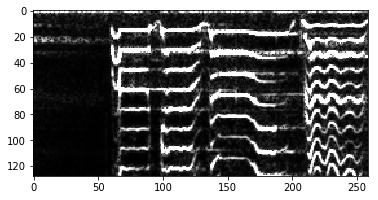

In [2]:
J=Johnny[:]


window=0.1
overlap=0.5
jshape = J.shape[0]


chunk = int(jshape*window)
offset = int(chunk*(1.-overlap))
spsong = [J[i:i+chunk] for i in range(0, jshape - chunk + offset, offset)]
j=spsong[11]

fft=audio_utilities.stft_for_reconstruction(j, 1024, 1024//4)
print(fft.shape)
module=(abs(fft).T)[:128,:,np.newaxis]

n,l,p=module.shape
module_debut=module[:,:259,:]


    
phase_j=np.angle(fft.T)
Image_aux_j=np.squeeze(np.stack([module_debut,module_debut,module_debut], axis=-1))
Image_j=Image_aux_j[np.newaxis,:,:,:]

plt.close()
plt.imshow(Image_aux_j)
plt.show()

ipd.Audio(j,rate=fs)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


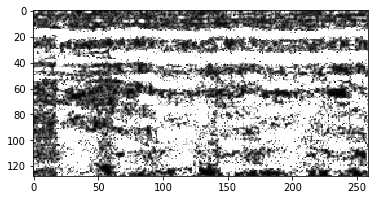

In [3]:
A=Ariana[:]


window=0.1
overlap=0.5
ashape = A.shape[0]


chunk = int(ashape*window)
offset = int(chunk*(1.-overlap))
spsong = [A[i:i+chunk] for i in range(0, ashape - chunk + offset, offset)]
a=spsong[9]

fft=audio_utilities.stft_for_reconstruction(a, 1024, 1024//4)
module=(abs(fft).T)[:128,:,np.newaxis]

n,l,p=module.shape
module_debut=module[:,:259,:]


    
phase_a=np.angle(fft.T)
Image_aux_a=np.squeeze(np.stack([module_debut,module_debut,module_debut], axis=-1))
Image_a=Image_aux_a[np.newaxis,:,:,:]

plt.close()
plt.imshow(Image_aux_a)
plt.show()

ipd.Audio(a,rate=fs)

In [ ]:
"""
load the genre classifier model and the dict associated
"""

model= models.load_model(pathToModel)
inputImage=model.input
layerDict=dict([(layer.name, layer) for layer in model.layers])

In [5]:
print(inputImage)
print(layerDict.keys())

Tensor("input_1:0", shape=(?, 128, 259, 3), dtype=float32)
dict_keys(['input_1', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool', 'sequential_1'])


In [6]:
"""
get the fonction which calculates loss and grads from inputImage
"""
ImageStyle=Image_j
ImageContent=Image_a
#iterate_style = getIterateFunctionGram(model,layerDict,inputImage,ImageStyle)
iterate = getIterateFunctionSum(model,layerDict,inputImage,ImageContent,ImageStyle,1,1)
#iterate = getIterateFunctionContent(model,layerDict, "block1_conv2", inputImage,ImageStyle)


In [7]:
print(ImageContent.shape)
print(ImageStyle.shape)

(1, 128, 259, 3)
(1, 128, 259, 3)


(1, 128, 259, 3)


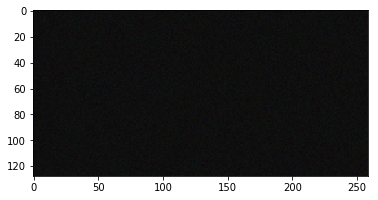

In [8]:
"""
random noise which is about to be transformed
"""

Noise_aux=np.random.randint(10,size=ImageStyle.shape)+10
#Noise_aux=ImageContent
plt.imshow(np.squeeze(Noise_aux))
Noise=np.array(Noise_aux,dtype=object)
print(Noise.shape)

In [9]:
##Adam
lr0=10
early_stopping=0
factor=0.95
epochs=20
niter=1000
lossValue = Adam(iterate,Noise,lr0,early_stopping,factor,epochs,niter)

10 1804.5967485156775 8.966495556069043
264.85352 1539.7432328906775
20 507.60425040421603 7.6216975239872
94.16063 413.4436211317551
30 204.48454670909493 6.931686780607564
56.28452 148.2000275135383
40 108.4589755392339 4.0130613201415795
44.799778 63.65919755461477
50 69.08833480130414 3.1739179905575665
40.798904 28.28943038235883
60 54.120209440482974 2.217525885415263
38.839825 15.2803847639693
70 48.13721804592992 1.341157199058692
38.297184 9.840034055451406
80 45.95802961825607 1.3815446162129603
38.000324 7.957705368988493
90 45.425058691955925 3.4836614284905276
37.91443 7.510629981018422
100 45.390864064386456 2.0641689132255885
37.916656 7.474207570245832
110 45.47116320038624 3.549569330972293
37.837917 7.633245872505382
120 45.2887415246622 2.465677830012821
37.804916 7.483825142826263
130 45.07015017803267 2.317509795016181
37.77285 7.297300141411576
140 45.310538877946406 2.325285833761053
37.760517 7.5500217575850765
150 45.241606290770235 2.062586754257728
37.738132 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


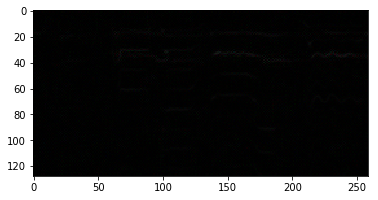

In [10]:
Noise=np.squeeze(Noise)
Noise=np.array(Noise,dtype=int)
plt.imshow(Noise)

(513, 513)
(128, 259)
(513, 513)
Reconstruction iteration: 1/300 RMSE: 0.9973821777472109 
Reconstruction iteration: 2/300 RMSE: 0.0258745779997273 
Reconstruction iteration: 3/300 RMSE: 0.02538795909270987 
Reconstruction iteration: 4/300 RMSE: 0.026395654054092325 
Reconstruction iteration: 5/300 RMSE: 0.027465671869391698 
Reconstruction iteration: 6/300 RMSE: 0.02834604500828625 
Reconstruction iteration: 7/300 RMSE: 0.02891711888671889 
Reconstruction iteration: 8/300 RMSE: 0.02925954329813005 
Reconstruction iteration: 9/300 RMSE: 0.029698148188102364 
Reconstruction iteration: 10/300 RMSE: 0.029925463237740233 
Reconstruction iteration: 11/300 RMSE: 0.03018610607400603 
Reconstruction iteration: 12/300 RMSE: 0.03028398680903802 
Reconstruction iteration: 13/300 RMSE: 0.03032284211613233 
Reconstruction iteration: 14/300 RMSE: 0.030448972631310803 
Reconstruction iteration: 15/300 RMSE: 0.030411027047334366 
Reconstruction iteration: 16/300 RMSE: 0.030521980531082394 
Reconstruct

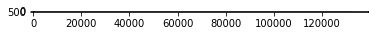

In [11]:
"""
get a song from the stft/fft module by using griffin lim algorithm (a better one)
"""

fft_size=1024
hopsamp=fft_size//4
iterations=300
sample_rate_hz=fs

def reverse_griffin2(module):
    n2,l2=phase_j.shape
    #absolue=np.zeros((max(n2,l2),max(n2,l2)))
    absolue=np.zeros(phase_j.shape)
    print(phase_j.shape)
    print(module.shape)
    n,l=module.shape
    for i in range(n):
        for j in range(min(l,l2)):
            absolue[i,j]=module[i,j]
    
    plt.imshow(absolue)
    absolue=absolue.T
    print(absolue.shape)
    x_reconstruct = audio_utilities.reconstruct_signal_griffin_lim(absolue,fft_size, hopsamp,iterations)
    max_sample = np.max(abs(x_reconstruct))
    if max_sample > 1.0:
        x_reconstruct = x_reconstruct / max_sample
    # Save the reconstructed signal to a WAV file.
    plt.plot([i for i in range(len(x_reconstruct))],x_reconstruct)
    print(x_reconstruct)
    audio_utilities.save_audio_to_file(x_reconstruct,sample_rate_hz)
    print("done")
    print(max_sample)
    ipd.Audio(x_reconstruct,rate=fs)
    
module=np.squeeze(Noise[:,:,0])
#module=np.squeeze(module)
reverse_griffin2(module)